# SciPy Exercises

### 1. For the linear regression example code in the lecture, change the parameters and we have the following code:

In [2]:
import numpy as np
from scipy.stats import linregress

x = np.random.randn(20)
y = 2 * x + 0.5 * np.random.randn(20)
slope, intercept, r_value, p_value, std_err = linregress(x, y)
slope, intercept

(2.2604801014173987, -0.049702508217282948)

Please plot the samples and the linear regression function like below

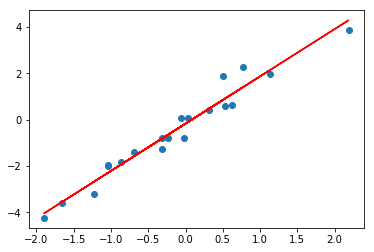

**Solution**

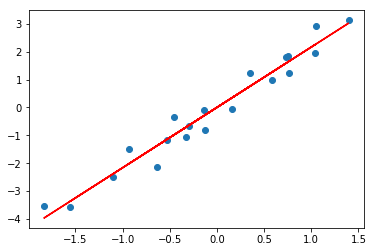

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

x = np.random.randn(20)
y = 2*x + 0.5 * np.random.randn(20)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, slope*x + intercept, 'r', label='fitted line')
plt.show()

### 2. Given a function: 
$f(x) = x^2 - 3x + 7$

Suppose we know an $x_0$ which makes $f(x_0) = 385$, please get the value of $x_0$

**Hint:** You may use *multivariate root finding* introduced in the lecture for solving this problem.

**Solution**

In [11]:
from scipy.optimize import fsolve
from scipy.optimize import fmin

def fy(xy, k):
    x, y = xy.tolist()
    return [
        x**2 - 3*x + 7 - y,
        y - k
    ]

r = fsolve(fy, [1, 1], 385)
print('x:{}, y:{}'.format(r[0], r[1]))

x:21.0, y:385.0


###  3. Write a recursive implementation of the bisection function described above

- **recusive function calls**: a function that calls itself

**Solution**

In [15]:
import numpy as np

def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b
    if upper - lower < tol:
        return 0.5 * (upper + lower)
    else:
        middle = 0.5 * (upper + lower)
        y = f(middle)
        print('f(x) = {:+.8f},  x = {}'.format(y, middle))
        if y > 0:   # Implies root is between lower and middle
            bisect(f, lower, middle)
        else:               # Implies root is between middle and upper
            bisect(f, middle, upper)
            
# Test bisect() function
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

bisect(f, 0, 1)

f(x) = +0.34147194,  x = 0.5
f(x) = -0.75000000,  x = 0.25
f(x) = -0.14557446,  x = 0.375
f(x) = +0.11913883,  x = 0.4375
f(x) = -0.00865271,  x = 0.40625
f(x) = +0.05648211,  x = 0.421875
f(x) = +0.02421260,  x = 0.4140625
f(x) = +0.00785290,  x = 0.41015625
f(x) = -0.00038186,  x = 0.408203125
f(x) = +0.00374006,  x = 0.4091796875
f(x) = +0.00168023,  x = 0.40869140625
f(x) = +0.00064947,  x = 0.408447265625
f(x) = +0.00013388,  x = 0.4083251953125
f(x) = -0.00012397,  x = 0.40826416015625
